# import Data

In [586]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## Cleaning data

In [587]:
df=pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')

In [588]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [589]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [590]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [591]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [592]:
df=df.dropna()

In [593]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: xlabel='CoapplicantIncome'>

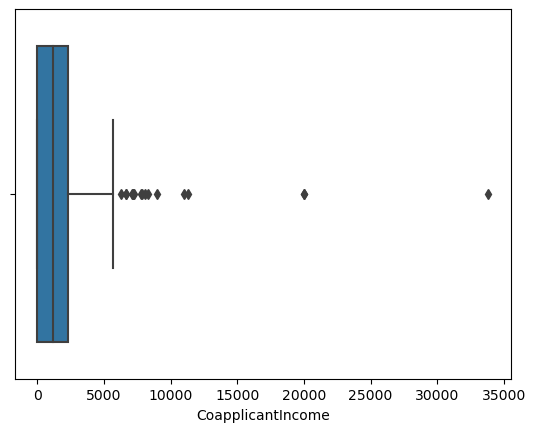

In [594]:
sns.boxplot(x='CoapplicantIncome',data=df)


<Axes: xlabel='CoapplicantIncome'>

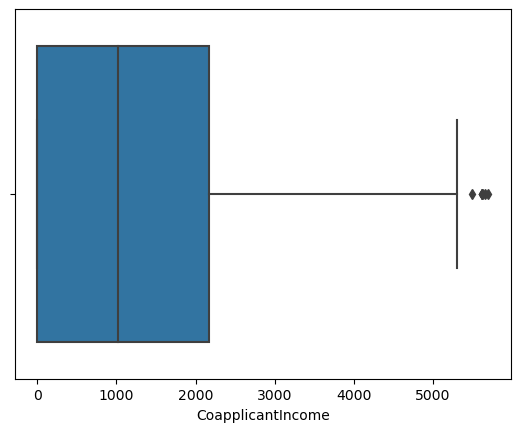

In [595]:
x='CoapplicantIncome'
q75,q25=np.percentile(df[x],[75,25])
IQR=q75-q25
Max=q75+(IQR*1.5)
Min=q25-(IQR*1.5)
df.loc[df[x] > Max]=np.nan
df.loc[df[x] <Min]=np.nan
df.dropna()
df.reset_index()
sns.boxplot(x=x,data=df)

<Axes: xlabel='ApplicantIncome'>

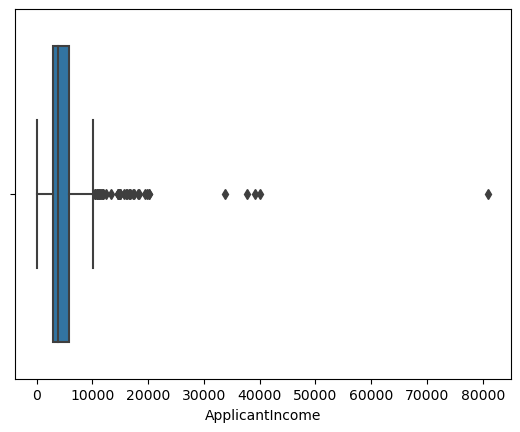

In [596]:
sns.boxplot(x='ApplicantIncome',data=df)

<Axes: xlabel='ApplicantIncome'>

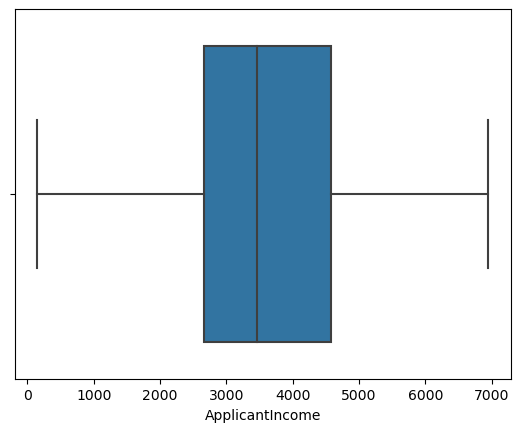

In [597]:
df=df[df['ApplicantIncome']<7000]
sns.boxplot(x='ApplicantIncome',data=df)



## Analysis for Data

<Axes: xlabel='Dependents'>

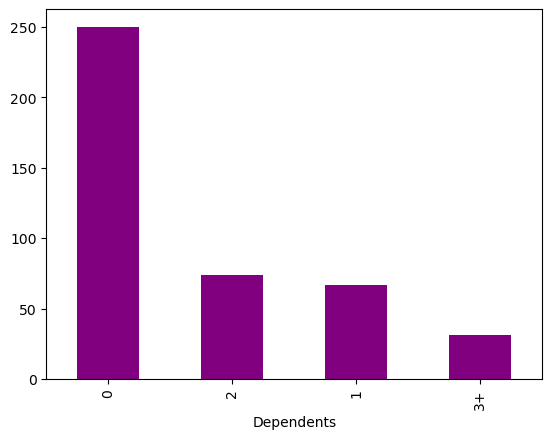

In [598]:
df['Dependents'].value_counts().plot.bar(color='purple')

<Axes: xlabel='Gender', ylabel='count'>

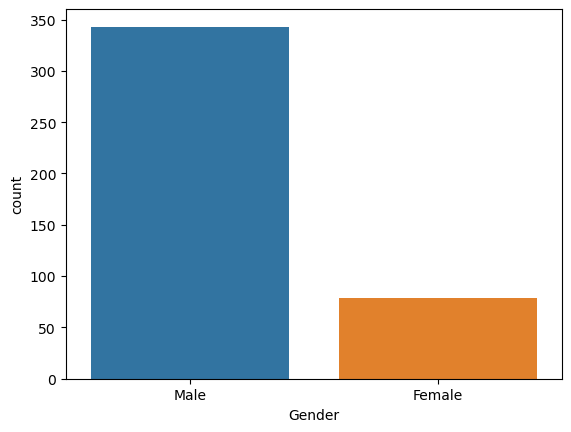

In [599]:
sns.countplot(x='Gender' ,data=df)

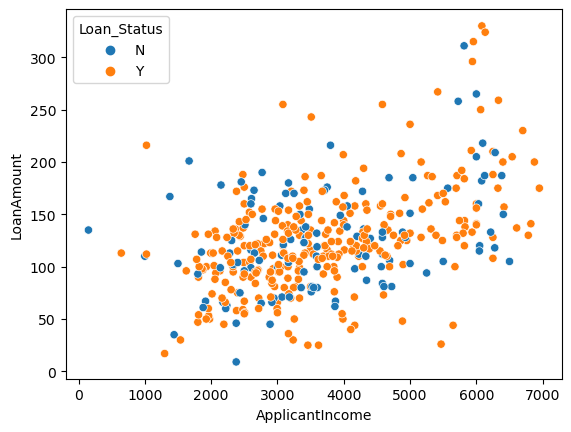

In [600]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df)
plt.show()

In [601]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            422 non-null    object 
 1   Gender             422 non-null    object 
 2   Married            422 non-null    object 
 3   Dependents         422 non-null    object 
 4   Education          422 non-null    object 
 5   Self_Employed      422 non-null    object 
 6   ApplicantIncome    422 non-null    float64
 7   CoapplicantIncome  422 non-null    float64
 8   LoanAmount         422 non-null    float64
 9   Loan_Amount_Term   422 non-null    float64
 10  Credit_History     422 non-null    float64
 11  Property_Area      422 non-null    object 
 12  Loan_Status        422 non-null    object 
dtypes: float64(5), object(8)
memory usage: 46.2+ KB


In [602]:
leb=LabelEncoder()
df['Gender']=leb.fit_transform(df['Gender'])
df['Married']=leb.fit_transform(df['Married'])
df['Education']=leb.fit_transform(df['Education'])
df['Self_Employed']=leb.fit_transform(df['Self_Employed'])
df['Property_Area']=leb.fit_transform(df['Property_Area'])
df['Loan_Status']=leb.fit_transform(df['Loan_Status'])
# df['Dependents']=df['Dependents'].replace({'+3':4})
df['Dependents']=df['Dependents'].replace({'3+':4})
df['Dependents']=df['Dependents'].astype(int)

In [603]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            422 non-null    object 
 1   Gender             422 non-null    int32  
 2   Married            422 non-null    int32  
 3   Dependents         422 non-null    int32  
 4   Education          422 non-null    int32  
 5   Self_Employed      422 non-null    int32  
 6   ApplicantIncome    422 non-null    float64
 7   CoapplicantIncome  422 non-null    float64
 8   LoanAmount         422 non-null    float64
 9   Loan_Amount_Term   422 non-null    float64
 10  Credit_History     422 non-null    float64
 11  Property_Area      422 non-null    int32  
 12  Loan_Status        422 non-null    int32  
dtypes: float64(5), int32(7), object(1)
memory usage: 34.6+ KB


In [604]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417.0,4196.0,267.0,360.0,1.0,2,1


<Axes: >

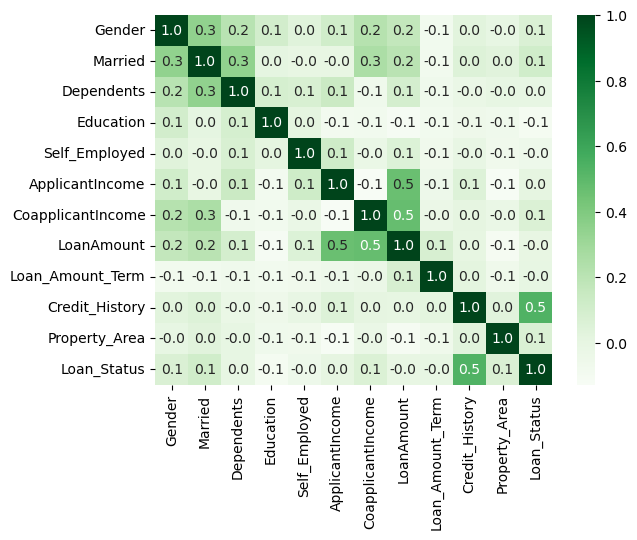

In [605]:
df.drop('Loan_ID',axis=1,inplace=True)
sns.heatmap(df.corr(),annot=True,fmt='.1f',cmap='Greens')

## Create Model

In [606]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

In [607]:
def ManyLibraries(model):
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    accuracy=classification_report(pred,y_test)
    print(f'Accuracy for Model \n {accuracy}')

In [608]:
model=SVC()
ManyLibraries(model)

Accuracy for Model 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.64      0.78        85

    accuracy                           0.64        85
   macro avg       0.50      0.32      0.39        85
weighted avg       1.00      0.64      0.78        85



In [609]:
model=DecisionTreeClassifier()
ManyLibraries(model)

Accuracy for Model 
               precision    recall  f1-score   support

         0.0       0.55      0.65      0.60        26
         1.0       0.83      0.76      0.80        59

    accuracy                           0.73        85
   macro avg       0.69      0.71      0.70        85
weighted avg       0.75      0.73      0.74        85



In [610]:
model=RandomForestClassifier()
ManyLibraries(model)

Accuracy for Model 
               precision    recall  f1-score   support

         0.0       0.48      0.88      0.62        17
         1.0       0.96      0.76      0.85        68

    accuracy                           0.79        85
   macro avg       0.72      0.82      0.74        85
weighted avg       0.87      0.79      0.81        85



In [611]:
model=KNeighborsClassifier()
ManyLibraries(model)

Accuracy for Model 
               precision    recall  f1-score   support

         0.0       0.19      0.46      0.27        13
         1.0       0.87      0.65      0.75        72

    accuracy                           0.62        85
   macro avg       0.53      0.56      0.51        85
weighted avg       0.77      0.62      0.67        85



In [612]:
model=LogisticRegression()
ManyLibraries(model)

Accuracy for Model 
               precision    recall  f1-score   support

         0.0       0.39      0.92      0.55        13
         1.0       0.98      0.74      0.84        72

    accuracy                           0.76        85
   macro avg       0.68      0.83      0.69        85
weighted avg       0.89      0.76      0.80        85



In [613]:
model=LogisticRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
cm=confusion_matrix(pred,y_test)

<Axes: >

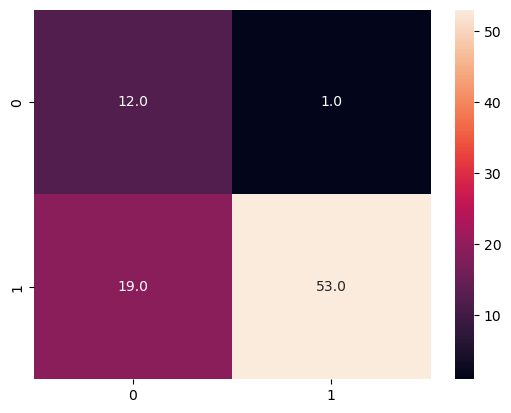

In [614]:
sns.heatmap(cm,annot=True,fmt='.1f')